In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Dataset\\Engineered\\online_shoppers_intention_Engineered.csv")

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,DislikeRates,TimeSpent
0,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(-0.001, 1.0]",0.000000,0.20,0.20,0.0,0.0,Feb,"(0.999, 2.0]","(0.999, 2.0]","(0.999, 3.0]","(0.999, 2.0]",Returning_Visitor,False,False,100.0,0.000000
1,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(1.0, 2.0]",64.000000,0.00,0.10,0.0,0.0,Feb,"(0.999, 2.0]","(0.999, 2.0]","(0.999, 3.0]","(0.999, 2.0]",Returning_Visitor,False,False,25.0,64.000000
2,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(-0.001, 1.0]",0.000000,0.20,0.20,0.0,0.0,Feb,"(2.0, 8.0]","(0.999, 2.0]","(3.0, 9.0]","(2.0, 3.0]",Returning_Visitor,False,False,100.0,0.000000
3,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(1.0, 2.0]",2.666667,0.05,0.14,0.0,0.0,Feb,"(2.0, 8.0]","(0.999, 2.0]","(0.999, 3.0]","(3.0, 20.0]",Returning_Visitor,False,False,47.5,2.666667
4,"(-0.001, 1.0]",0.0,"(-0.001, 2.0]",0.0,"(9.0, 10.0]",627.500000,0.02,0.05,0.0,0.0,Feb,"(2.0, 8.0]","(2.0, 13.0]","(0.999, 3.0]","(3.0, 20.0]",Returning_Visitor,True,False,17.5,627.500000


In [3]:
drop_features = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration", 
                 "BounceRates", "ExitRates", "SpecialDay", "TimeSpent"]
not_cat_features = ["Revenue","Weekend"]

df["Weekend"] = df["Weekend"].astype(str)

df = df.drop(columns=drop_features)

df.head()

,Administrative,Informational,ProductRelated,PageValues,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,DislikeRates
0,"(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]",0.0,Feb,"(0.999, 2.0]","(0.999, 2.0]","(0.999, 3.0]","(0.999, 2.0]",Returning_Visitor,False,False,100.0
1,"(-0.001, 1.0]","(-0.001, 2.0]","(1.0, 2.0]",0.0,Feb,"(0.999, 2.0]","(0.999, 2.0]","(0.999, 3.0]","(0.999, 2.0]",Returning_Visitor,False,False,25.0
2,"(-0.001, 1.0]","(-0.001, 2.0]","(-0.001, 1.0]",0.0,Feb,"(2.0, 8.0]","(0.999, 2.0]","(3.0, 9.0]","(2.0, 3.0]",Returning_Visitor,False,False,100.0
3,"(-0.001, 1.0]","(-0.001, 2.0]","(1.0, 2.0]",0.0,Feb,"(2.0, 8.0]","(0.999, 2.0]","(0.999, 3.0]","(3.0, 20.0]",Returning_Visitor,False,False,47.5
4,"(-0.001, 1.0]","(-0.001, 2.0]","(9.0, 10.0]",0.0,Feb,"(2.0, 8.0]","(2.0, 13.0]","(0.999, 3.0]","(3.0, 20.0]",Returning_Visitor,True,False,17.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Administrative    12330 non-null  object 
 1   Informational     12330 non-null  object 
 2   ProductRelated    12330 non-null  object 
 3   PageValues        12330 non-null  float64
 4   Month             12330 non-null  object 
 5   OperatingSystems  12330 non-null  object 
 6   Browser           12330 non-null  object 
 7   Region            12330 non-null  object 
 8   TrafficType       12330 non-null  object 
 9   VisitorType       12330 non-null  object 
 10  Weekend           12330 non-null  object 
 11  Revenue           12330 non-null  bool   
 12  DislikeRates      12330 non-null  float64
dtypes: bool(1), float64(2), object(10)
memory usage: 1.1+ MB


In [5]:
cat_features = ["Administrative","Informational","OperatingSystems", "Browser", 
                "Region", "TrafficType","Month", "VisitorType", 
                "Weekend", "ProductRelated"]

new_df = df.copy() # test data 
new_df = pd.get_dummies(new_df, columns=cat_features, drop_first=True)

df = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PageValues                     12330 non-null  float64
 1   Revenue                        12330 non-null  bool   
 2   DislikeRates                   12330 non-null  float64
 3   Administrative_(1.0, 27.0]     12330 non-null  uint8  
 4   Informational_(2.0, 27.0]      12330 non-null  uint8  
 5   OperatingSystems_(2.0, 8.0]    12330 non-null  uint8  
 6   Browser_(2.0, 13.0]            12330 non-null  uint8  
 7   Region_(3.0, 9.0]              12330 non-null  uint8  
 8   TrafficType_(2.0, 3.0]         12330 non-null  uint8  
 9   TrafficType_(3.0, 20.0]        12330 non-null  uint8  
 10  Month_Dec                      12330 non-null  uint8  
 11  Month_Feb                      12330 non-null  uint8  
 12  Month_Jul                      12330 non-null 

In [7]:
corr = new_df.corr()

multicor = {}

for column in corr.columns:
    for index in corr.index:
        if abs(corr.loc[index][column]) > 0.3 and abs(corr.loc[index][column]) != 1.0:
            multicor[(index, column)] = abs(corr.loc[index][column])

#features = ["Month_May", "ProductRelated_(109.0, 705.0]", "Browser_13", 
#            "OperatingSystems_8", "TrafficType_20"]

#new_df.drop(columns=features, inplace=True)

multicor

{('Revenue', 'PageValues'): 0.49256929525114634,
 ('PageValues', 'Revenue'): 0.49256929525114634,
 ('Administrative_(1.0, 27.0]', 'DislikeRates'): 0.32728385601574,
 ('DislikeRates', 'Administrative_(1.0, 27.0]'): 0.32728385601574,
 ('TrafficType_(3.0, 20.0]', 'TrafficType_(2.0, 3.0]'): 0.30471365660931105,
 ('TrafficType_(2.0, 3.0]', 'TrafficType_(3.0, 20.0]'): 0.30471365660931105,
 ('Month_Nov', 'Month_May'): 0.3471818999445244,
 ('Month_May', 'Month_Nov'): 0.3471818999445244}

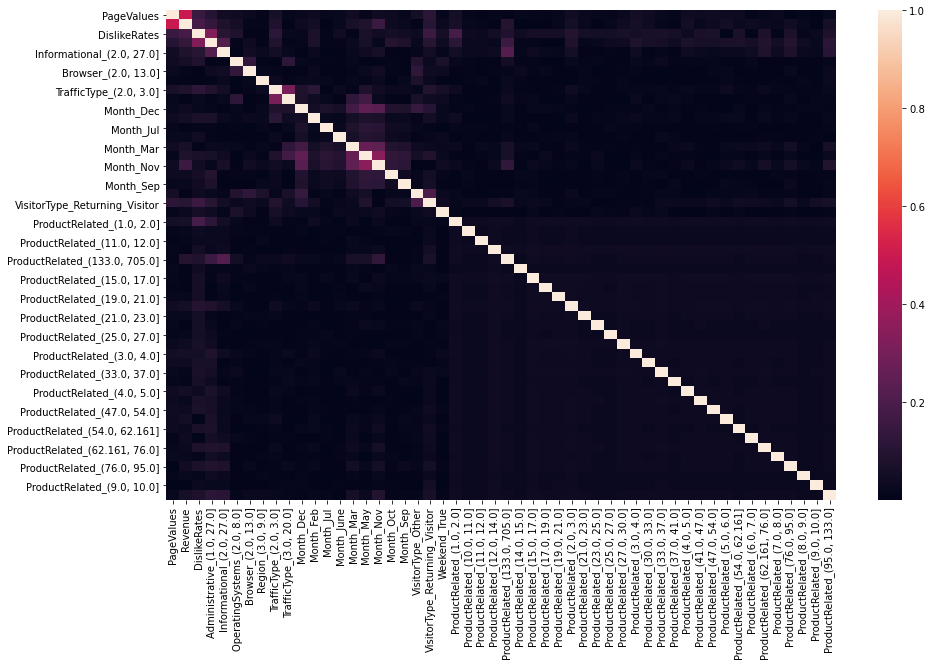

In [8]:
plt.subplots(figsize=(15, 9))

sns.heatmap(abs(new_df.corr()))

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PageValues                     12330 non-null  float64
 1   Revenue                        12330 non-null  bool   
 2   DislikeRates                   12330 non-null  float64
 3   Administrative_(1.0, 27.0]     12330 non-null  uint8  
 4   Informational_(2.0, 27.0]      12330 non-null  uint8  
 5   OperatingSystems_(2.0, 8.0]    12330 non-null  uint8  
 6   Browser_(2.0, 13.0]            12330 non-null  uint8  
 7   Region_(3.0, 9.0]              12330 non-null  uint8  
 8   TrafficType_(2.0, 3.0]         12330 non-null  uint8  
 9   TrafficType_(3.0, 20.0]        12330 non-null  uint8  
 10  Month_Dec                      12330 non-null  uint8  
 11  Month_Feb                      12330 non-null  uint8  
 12  Month_Jul                      12330 non-null 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PageValues                     12330 non-null  float64
 1   Revenue                        12330 non-null  bool   
 2   DislikeRates                   12330 non-null  float64
 3   Administrative_(1.0, 27.0]     12330 non-null  uint8  
 4   Informational_(2.0, 27.0]      12330 non-null  uint8  
 5   OperatingSystems_(2.0, 8.0]    12330 non-null  uint8  
 6   Browser_(2.0, 13.0]            12330 non-null  uint8  
 7   Region_(3.0, 9.0]              12330 non-null  uint8  
 8   TrafficType_(2.0, 3.0]         12330 non-null  uint8  
 9   TrafficType_(3.0, 20.0]        12330 non-null  uint8  
 10  Month_Dec                      12330 non-null  uint8  
 11  Month_Feb                      12330 non-null  uint8  
 12  Month_Jul                      12330 non-null 

# Modelling

In [11]:
X = df.drop(columns=["Revenue"])
y = df["Revenue"]

### Using train test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [13]:
random_forest_score = random_forest.score(X_test, y_test)
gnb_score = gnb.score(X_test, y_test)
svm_score = svm.score(X_test, y_test)

print(f"Random forest score : {round(random_forest_score * 100)}%")
print(f"Naive bayes score : {round(gnb_score * 100)}%")
print(f"Support Vector Machine score : {round(svm_score * 100)}%")

Random forest score : 89.0%
Naive bayes score : 59.0%
Support Vector Machine score : 89.0%


In [14]:
random_probs = [0 for _ in range(len(y_test))]

random_forest_probs = random_forest.predict_proba(X_test)[:, 1]
gnb_probs = gnb.predict_proba(X_test)[:, 1]
svm_probs = svm.predict_proba(X_test)[:, 1]

r_auc = roc_auc_score(y_test, random_probs)
random_forest_auc = roc_auc_score(y_test, random_forest_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

print(f"Score of random auc : {r_auc}")
print(f"Score of random forest auc : {random_forest_auc}")
print(f"Score of naive bayes auc : {gnb_auc}")
print(f"Score of support vector machine auc : {svm_auc}")

Score of random auc : 0.5
Score of random forest auc : 0.9160560885853164
Score of naive bayes auc : 0.7927147184260327
Score of support vector machine auc : 0.876927137069262


In [15]:
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
random_forest_fpr, random_forest_tpr, _ = roc_curve(y_test, random_forest_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

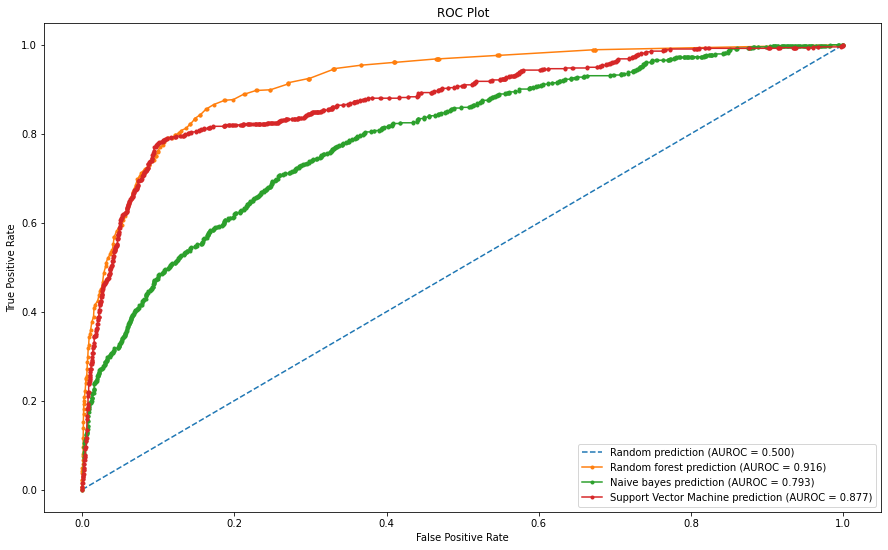

In [16]:
fig, ax = plt.subplots(figsize=(15, 9))

plt.plot(random_fpr, random_tpr, linestyle="--", label="Random prediction (AUROC = %0.3f)"%r_auc)
plt.plot(random_forest_fpr, random_forest_tpr, marker=".", label="Random forest prediction (AUROC = %.3f)"%random_forest_auc)
plt.plot(gnb_fpr, gnb_tpr, marker=".", label="Naive bayes prediction (AUROC = %0.3f)"%gnb_auc)
plt.plot(svm_fpr, svm_tpr, marker=".", label="Support Vector Machine prediction (AUROC = %0.3f)"%svm_auc)

plt.title("ROC Plot")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()

plt.show()

### Using KFold

In [17]:
N = 5
skf = StratifiedKFold(n_splits=N, random_state=42, shuffle=True)
random_forest = RandomForestClassifier()
gnb = GaussianNB()
svm = SVC()

random_forest_score = np.array([])
gnb_score = np.array([])
svm_score = np.array([])

for fold, (trn_idx, val_idx) in enumerate(skf.split(X, y), 1):
    print(f"Fold {fold}\n-------------------------------------")
    
    random_forest.fit(X.iloc[trn_idx], y.iloc[trn_idx])
    gnb.fit(X.iloc[trn_idx], y.iloc[trn_idx])
    svm.fit(X.iloc[trn_idx], y.iloc[trn_idx])
    
    print(f"Fold {fold}, random forest score : {random_forest.score(X.iloc[val_idx], y.iloc[val_idx])}")
    random_forest_score = np.append(random_forest_score, random_forest.score(X.iloc[val_idx], y.iloc[val_idx]))
    print(f"Fold {fold}, naive bayes score : {gnb.score(X.iloc[val_idx], y.iloc[val_idx])}")
    gnb_score = np.append(gnb_score, gnb.score(X.iloc[val_idx], y.iloc[val_idx]))
    print(f"Fold {fold}, support vector machine score : {svm.score(X.iloc[val_idx], y.iloc[val_idx])}\n-------------------------------------")
    svm_score = np.append(svm_score, svm.score(X.iloc[val_idx], y.iloc[val_idx]))
    
print(f"Mean score of random forest : {random_forest_score.mean()}\n")
print(f"Mean score of naive bayes : {gnb_score.mean()}\n")
print(f"Mean score of support vector machine : {svm_score.mean()}\n")

Fold 1
-------------------------------------
Fold 1, random forest score : 0.8953771289537713
Fold 1, naive bayes score : 0.5656934306569343
Fold 1, support vector machine score : 0.8949716139497161
-------------------------------------
Fold 2
-------------------------------------
Fold 2, random forest score : 0.8965936739659367
Fold 2, naive bayes score : 0.5940794809407948
Fold 2, support vector machine score : 0.8868613138686131
-------------------------------------
Fold 3
-------------------------------------
Fold 3, random forest score : 0.8982157339821574
Fold 3, naive bayes score : 0.5961070559610706
Fold 3, support vector machine score : 0.8953771289537713
-------------------------------------
Fold 4
-------------------------------------
Fold 4, random forest score : 0.8933495539334956
Fold 4, naive bayes score : 0.605433901054339
Fold 4, support vector machine score : 0.8998377939983779
-------------------------------------
Fold 5
-------------------------------------
Fold 5, 